**10.K-means Clustering**

Shape of the dataset: (150, 4)

First 10 predicted cluster labels: [1 1 1 1 1 1 1 1 1 1]
Number of samples per cluster (counts): [53 50 47]


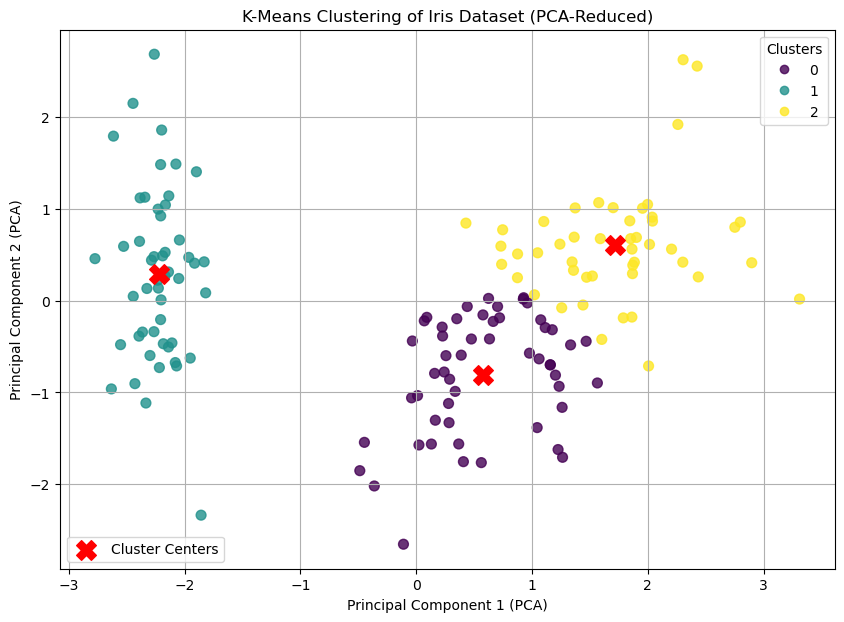


Adjusted Rand Index (ARI) comparing clusters to true labels: 0.620


In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


iris = load_iris()
X = iris.data
y = iris.target

print(f"Shape of the dataset: {X.shape}")

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(X_scaled)

cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

print(f"\nFirst 10 predicted cluster labels: {cluster_labels[:10]}")
print(f"Number of samples per cluster (counts): {np.bincount(cluster_labels)}")

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
centers_pca = pca.transform(cluster_centers)


plt.figure(figsize=(10, 7))

scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.8)


plt.scatter(centers_pca[:, 0], centers_pca[:, 1], marker='X', s=200, c='red', label='Cluster Centers')

plt.xlabel('Principal Component 1 (PCA)')
plt.ylabel('Principal Component 2 (PCA)')
plt.title('K-Means Clustering of Iris Dataset (PCA-Reduced)')


legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(legend1)
plt.legend(loc='lower left')

plt.grid(True)
plt.show()

from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(y, cluster_labels)
print(f"\nAdjusted Rand Index (ARI) comparing clusters to true labels: {ari:.3f}")